In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [2]:
# For plotting gradient descent
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

# Learning schedule for gradient descent
def learning_schedule(t):
    return t0 / (t + t1)

# Plotting learning curves
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

# LINEAR REGRESSION

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

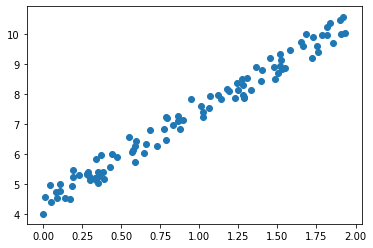

In [4]:
plt.scatter(X,y)
plt.show()

# Normal Equation

### Finding best theta

In [5]:
# np.linalg.invinv() : Iverses a matrix
# np.c_ : Translates slice objects to concatenation along the second axis.
# dot() : matrix multiplication

# Find best theta that minimizes the rmse
X_b = np.c_[np.ones((100, 1)), X] # add add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #X_b.T X_b transpose

print("Best theta: \n",theta_best)
print("theta0 =",theta_best[0])
print("theta1 =",theta_best[1])

Best theta: 
 [[4.41093854]
 [3.0538947 ]]
theta0 = [4.41093854]
theta1 = [3.0538947]


### Making prediction using best theta

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
print("X_new:\n",X_new)
print("X_new_b:\n",X_new_b)

X_new:
 [[0]
 [2]]
X_new_b:
 [[1. 0.]
 [1. 2.]]


In [7]:
# y^=θ(x) = (θ)·x
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.41093854],
       [10.51872794]])

### Plotting model's predictions

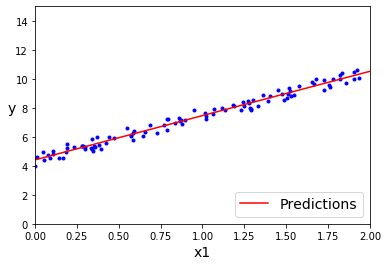

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("x1",fontsize = 14)
plt.ylabel("y", fontsize = 14, rotation = 0)
plt.axis([0,2,0,15])
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.legend(loc="lower right", fontsize=14)
plt.show()

## Linear Regression with Scikit-Learn

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Thetas
lin_reg.intercept_, lin_reg.coef_

(array([4.41093854]), array([[3.0538947]]))

In [10]:
# Least squares function (np.linalg.lstsq)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.41093854],
       [3.0538947 ]])

In [11]:
# Pseudoinverse function (np.linalg.pinv)
np.linalg.pinv(X_b).dot(y)

array([[4.41093854],
       [3.0538947 ]])

In [12]:
# Prediction
y_pred = lin_reg.predict(X_new)
y_pred

array([[ 4.41093854],
       [10.51872794]])

# Gradient Descent

## Linear regression with Batch Gradient Descent


In [13]:
learning_rate = 0.1 # η
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # random initialization

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - learning_rate * gradients
theta

array([[4.41093854],
       [3.0538947 ]])

In [14]:
# Prediciton
X_new_b.dot(theta)

array([[ 4.41093854],
       [10.51872794]])

#### Plotting gradient descent with various learning rates (0.02, 0.1, 0.5)

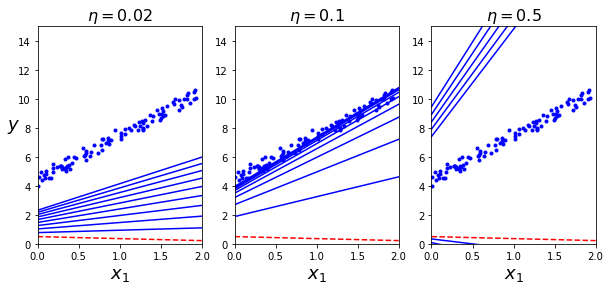

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent using learning schedule

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule parameters
theta = np.random.rand(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m): #picks a random instance in the training set at every step
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)
theta

array([[4.41791316],
       [3.05455087]])

## Linear regression with Stochastic Gradient Descent using scikit-learn

In [17]:
# maximum 1000 epochs (max_iter=1000)
# or until the loss drops by less than 1e-3 during one epoch (tol=1e-3),
# starting with a learning rate of 0.1 (eta0=0.1)
# does not use any regularization (penalty=None)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

# thetas
sgd_reg.intercept_, sgd_reg.coef_

(array([4.39813269]), array([3.0728114]))

## Mini-batch Gradient Descent

In [18]:
theta_path_mgd = []
n_iterations, minibatch_size = 50, 20
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
t0, t1 = 200, 1000
t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(t)
        theta = theta - learning_rate * gradients
        theta_path_mgd.append(theta)
theta

array([[4.3988392 ],
       [3.03978142]])

### Gradient descent paths in parameter space

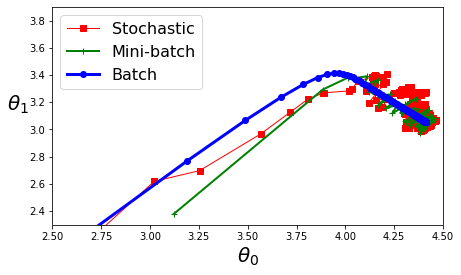

In [19]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# POLYNOMIAL REGRESSION

### Generate some nonlinear data based on a quadratic equation (form y = ax^2 + bx + c)


In [20]:
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) #y = 0.5x1^2 + x1 + 2 + Gaussian noise.

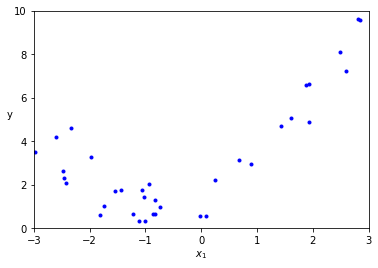

In [21]:
# Plot the dataset
plt.plot(X,y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.show()

### Transform the training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features

In [22]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X[0]:", X[0])
print("X_poly[0]:", X_poly[0]) # contains the original feature of X & the square of this feature

X[0]: [-0.01971508]
X_poly[0]: [-0.01971508  0.00038868]


### Fit linear regression model to the extended training data

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.87009469]), array([[1.01811444, 0.50512305]]))

(array([1.87009469]), array([[1.01811444, 0.50512305]])) means:
y = 0.50X1^2 + 1.01X1 + 1.87

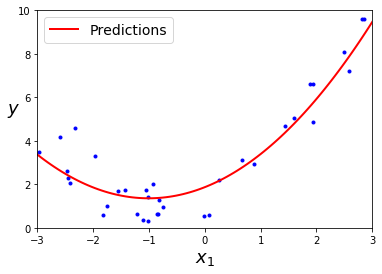

In [24]:
# Prediction
X_test = np.linspace(-3, 3, 100).reshape(100, 1) # X_new
X_test_poly = poly_features.transform(X_test)
y_preds = lin_reg.predict(X_test_poly)

# Plotting predictions vs actual data points
plt.plot(X, y, "b.")
plt.plot(X_test, y_preds, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves

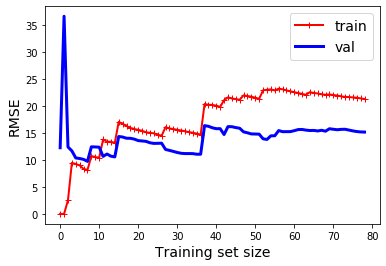

In [25]:
lin_reg = LinearRegression()

# plot_learning_curves(model, X, y)
plot_learning_curves(lin_reg, X, y)

#### Look at the learning curves of a 10th-degree polynomial model on the same data

In [26]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

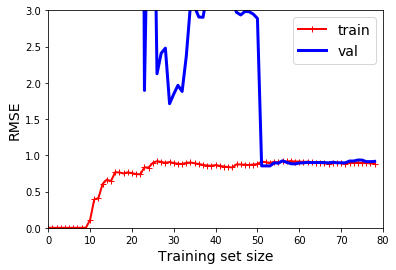

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)
plt.axis([0, 80, 0, 3])
plt.show()

# REGULARIZED LINEAR MODELS

In [28]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

## Ridge Regression

In [29]:
# Ridge Regression with Scikit-Learn using a closed-form solution
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [30]:
# And using SGD (penalty = "l2")
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([1.46543286])

## Lasso Regression

In [31]:
# Lasso Regression with Scikit-learn
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)

lasso_reg.predict([[1.5]])

array([1.53788174])

In [32]:
# And using SGD (penalty = "l1")
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([1.46938541])

## Elastic Net

In [33]:
# l1_ratio corresponds to the mix ratio r
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

In [34]:
# Prepare the data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [35]:
poly_features = PolynomialFeatures(degree=90, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

# Scaling
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)


In [36]:
sgd_reg = SGDRegressor(max_iter=1, tol= -np.infty, warm_start=True,
                      penalty=None, learning_rate="constant",eta0=0.0005)

In [37]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

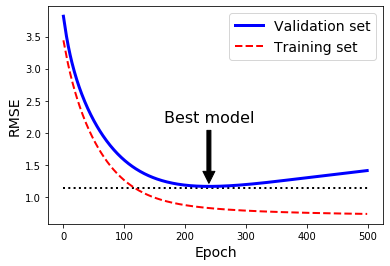

In [38]:
# Creating the plot
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16)

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [39]:
print("Best epoch:",best_epoch)
best_model

Best epoch: 239


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)